In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Use pandas to get some insights into the data (10 marks)


In [2]:
df = pd.read_csv('house_rental_data.csv')
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


### Dropping the unnamed column

In [3]:
df.drop('Unnamed: 0',axis = 1, inplace = True)

### See first 10 and last 10 entries

In [4]:
print('--------First 10 entries -------')
print(df.head(10))
print('--------Last 10 entries -------')
print(df.tail(10))

--------First 10 entries -------
       Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom   Price
0  1177.698      2           7        2            2         2   62000
1  2134.800      5           7        4            2         2   78000
2  1138.560      5           7        2            2         1   58000
3  1458.780      2           7        3            2         2   45000
4   967.776     11          14        3            2         2   45000
5  1127.886     11          12        4            2         2  148000
6  1352.040      5           7        3            2         1   58000
7   757.854      5          14        1            0         1   48000
8  1152.792     10          12        3            2         2   45000
9  1423.200      4           5        4            2         2   65000
--------Last 10 entries -------
         Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom   Price
635  1889.298     18          21        3            2         2   70000
636  126

### Number of observations in the dataset

In [5]:
print(f'Number of Observations : {df.shape[0]}')

Number of Observations : 645


### Number of columns in the dataset

In [8]:
print(f'Number of columns : {df.shape[1]}')

Number of columns : 7


### Names of all the columns

In [9]:
df.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

### Datatype of each column

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


### Mean, min and max, quartiles and standard deviation about the data

In [11]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


### Number of houses whose price is greater than 60000

In [12]:
len(df[df['Price']>60000])

225

## 2) Show some interesting visualization of the data (10 marks)


### Bar Graph


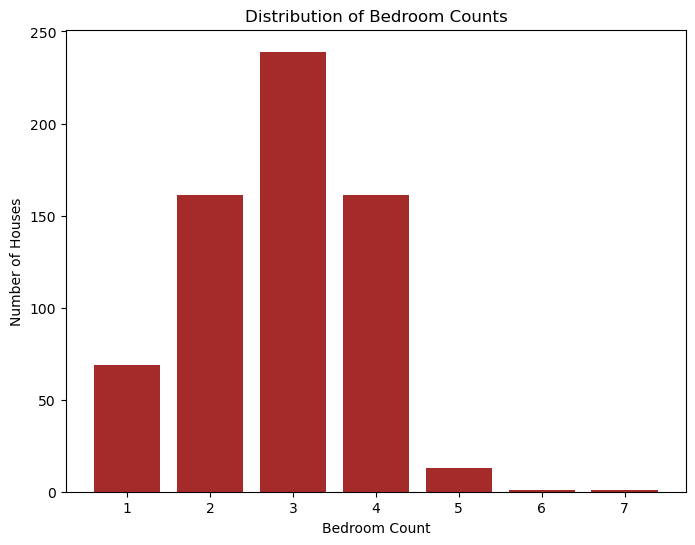

In [13]:
# Bar plot of the number of houses with different bedroom counts
bedroom_counts = df['Bedroom'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(bedroom_counts.index, bedroom_counts.values,color = 'brown')
plt.xlabel('Bedroom Count')
plt.ylabel('Number of Houses')
plt.title('Distribution of Bedroom Counts')
plt.show()

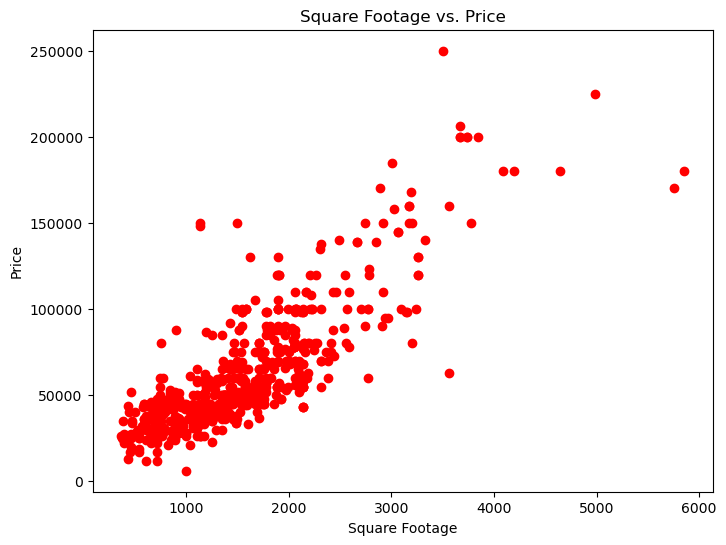

In [14]:
# Scatter plot of square footage (Sqft) vs. price
plt.figure(figsize=(8, 6))
plt.scatter(df['Sqft'], df['Price'], color = 'r')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Square Footage vs. Price')
plt.show()

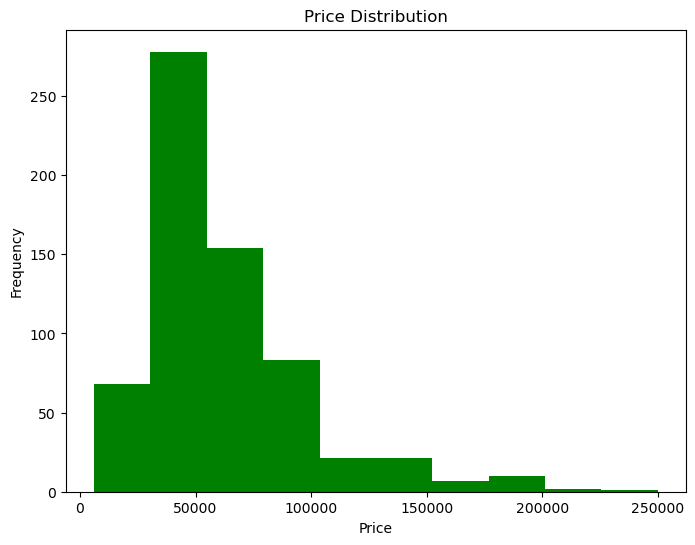

In [15]:
# Histogram of the prices
plt.figure(figsize=(8, 6))
plt.hist(df['Price'], bins=10, color = 'g')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()


### Boxplot of prices for each bedroom count:


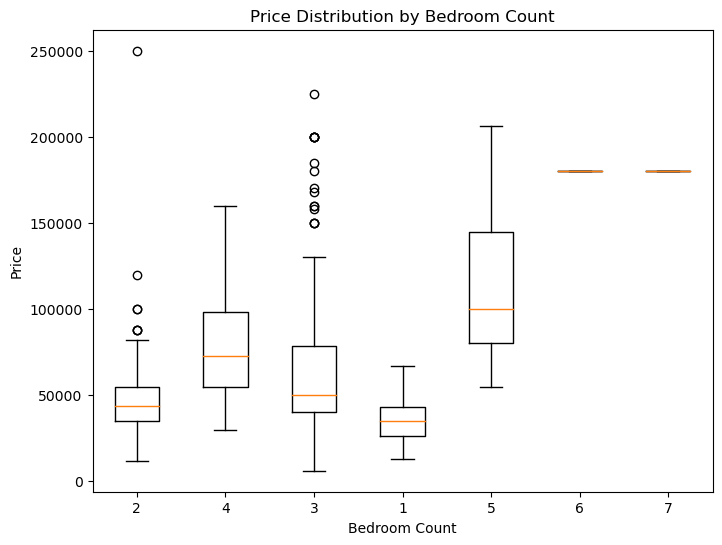

In [16]:
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['Bedroom'] == i]['Price'] for i in df['Bedroom'].unique()])
plt.xlabel('Bedroom Count')
plt.ylabel('Price')
plt.title('Price Distribution by Bedroom Count')
plt.xticks(range(1, len(df['Bedroom'].unique()) + 1), df['Bedroom'].unique())
plt.show()

### Bar plot of the average price for each floor:


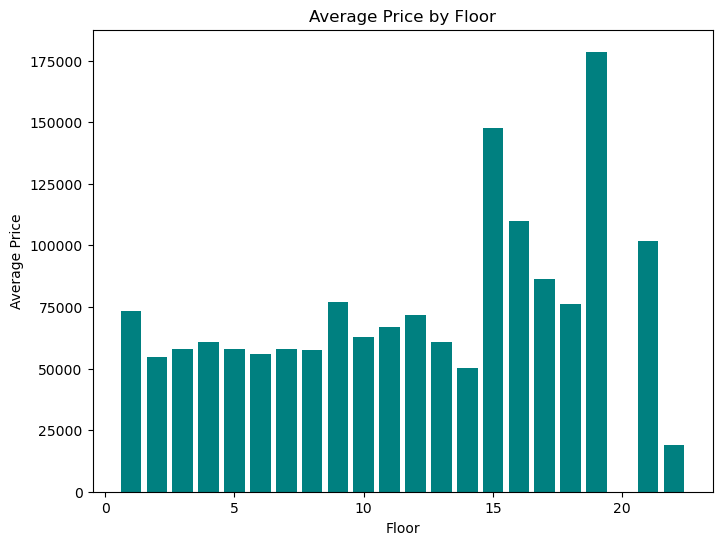

In [17]:
average_price_by_floor = df.groupby('Floor')['Price'].mean()
plt.figure(figsize=(8, 6))
plt.bar(average_price_by_floor.index, average_price_by_floor.values,color = 'teal')
plt.xlabel('Floor')
plt.ylabel('Average Price')
plt.title('Average Price by Floor')
plt.show()

### Stacked bar plot of the count of bedrooms for each floor:


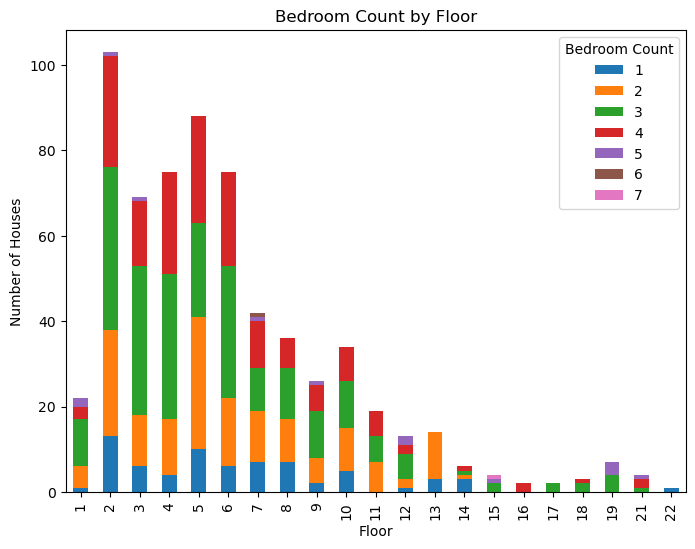

In [18]:
bedroom_counts_by_floor = df.groupby('Floor')['Bedroom'].value_counts().unstack()
bedroom_counts_by_floor.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('Floor')
plt.ylabel('Number of Houses')
plt.title('Bedroom Count by Floor')
plt.legend(title='Bedroom Count')
plt.show()

### Pie chart of the distribution of living room counts:


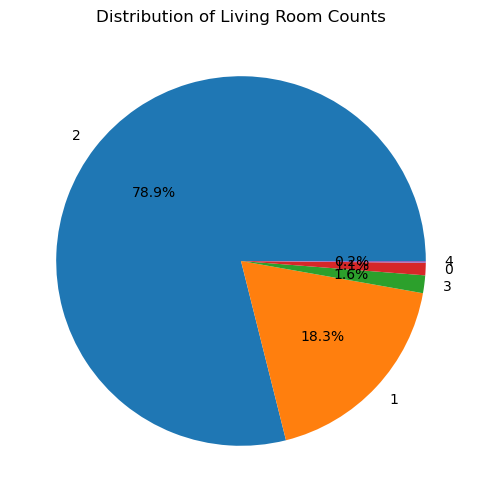

In [19]:
living_room_counts = df['Living.Room'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(living_room_counts.values, labels=living_room_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Living Room Counts')
plt.show()

### Histogram of the square footage (Sqft) grouped by the number of floors:


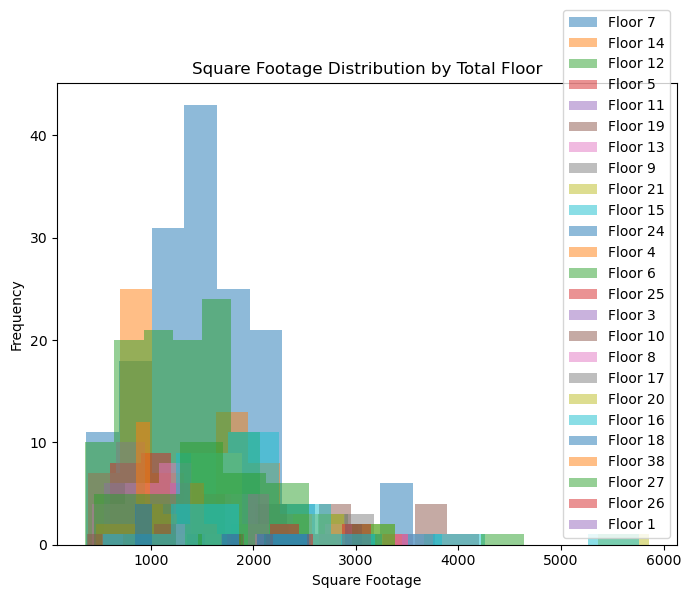

In [20]:
plt.figure(figsize=(8, 6))
for floor in df['TotalFloor'].unique():
    plt.hist(df[df['TotalFloor'] == floor]['Sqft'], bins=10, alpha=0.5, label=f'Floor {floor}')
plt.xlabel('Square Footage')
plt.ylabel('Frequency')
plt.title('Square Footage Distribution by Total Floor')
plt.legend()
plt.show()

### Scatter plot of square footage (Sqft) vs. total number of floors:


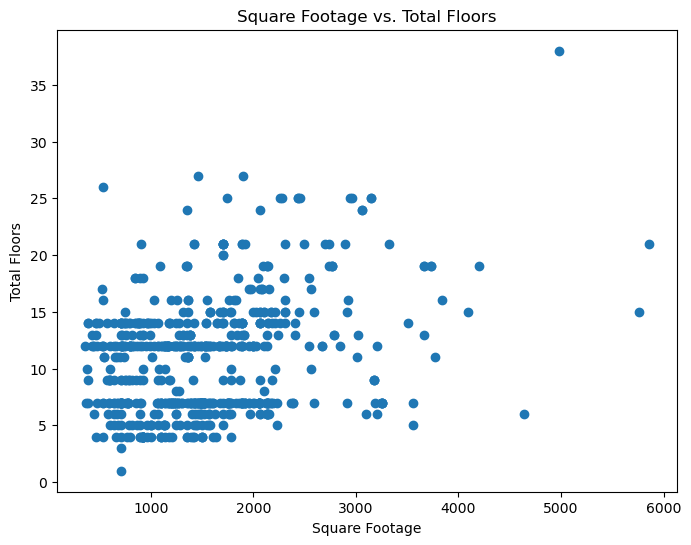

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Sqft'], df['TotalFloor'])
plt.xlabel('Square Footage')
plt.ylabel('Total Floors')
plt.title('Square Footage vs. Total Floors')
plt.show()

### Heatmap showing the correlation matrix between numerical features:


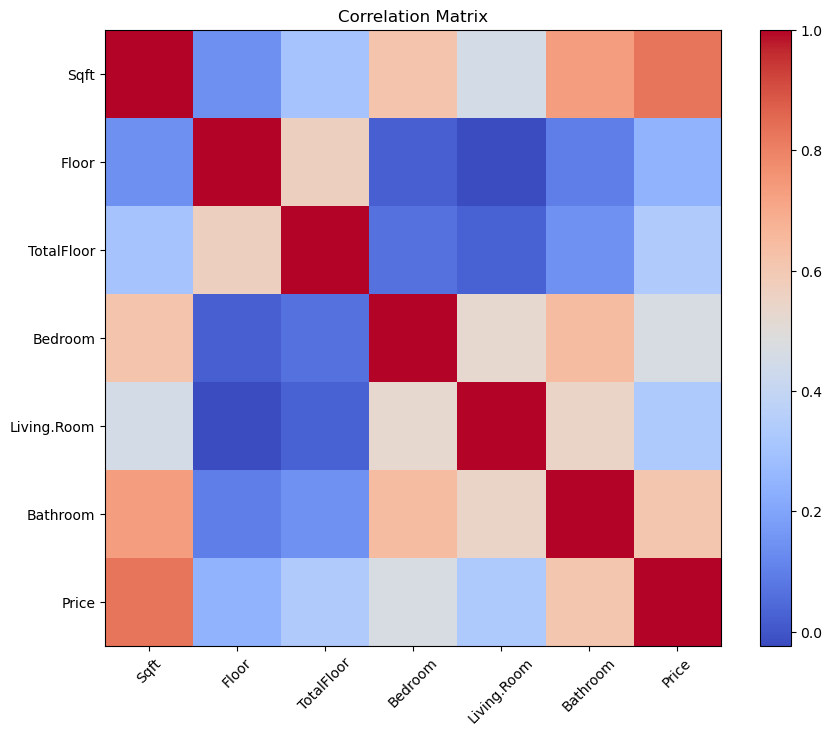

In [22]:
corr_matrix = df[['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom', 'Price']].corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

## 3) Manage data for training & testing ( 20 Marks )


In [23]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = df.drop('Price', axis=1)  # Features
y = df['Price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set - X:", X_train.shape)
print("Training set - y:", y_train.shape)
print("Testing set - X:", X_test.shape)
print("Testing set - y:", y_test.shape)


Training set - X: (516, 6)
Training set - y: (516,)
Testing set - X: (129, 6)
Testing set - y: (129,)


## 4) Finding a better value for k ( 10 Marks )

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# Separate the features (X) and the target variable (y)
X = df.drop('Price', axis=1)  # Features
y = df['Price']  # Target variable

# Define a list of k values to try
k_values = [3, 5, 7, 9, 11]

# Perform cross-validation for each k value and compute the mean score
cv_scores = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(-scores.mean())

# Find the best k value with the lowest mean squared error
best_k = k_values[cv_scores.index(min(cv_scores))]
print("Best k:", best_k)


Best k: 5
